In [230]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api
from sklearn.metrics import mean_squared_error

If the data has a seasonal component, then SARIMA (Seasonal ARIMA) instead of ARIMA model is used.

It adds three new hyperparameters to specify the AR, I and MA for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

SARIMA(p,d,q)(P,D,Q)m

P=1 would make use of the first seasonally offset observation in the model, e.g. t-(m*1). P=2, would use the last two seasonally offset observations t-(m * 1), t-(m * 2).

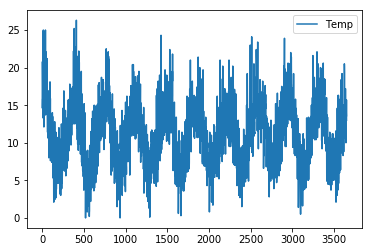

In [185]:
data = pd.read_csv('datasets/daily-min-temperatures.csv')
data.plot()

y = np.ravel(data['Temp'])

Trend (AR=21,D=0,MA=0), Seasonality (AR=(1*30,2*30), I=0, MA=0)

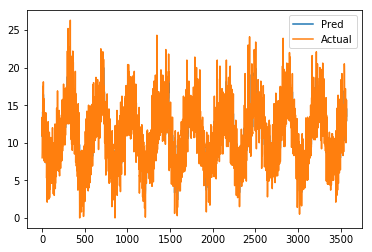

In [186]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y, order=(21,0,0), seasonal_order=(2,0,0,30))

model_fit = model.fit()
yhat = model_fit.predict(start=60+21, end=len(y))

plt.plot(yhat,label='Pred')
ys = y[-len(yhat):]
plt.plot(ys,label='Actual')
plt.legend()

rmse= 1.2896587677049212


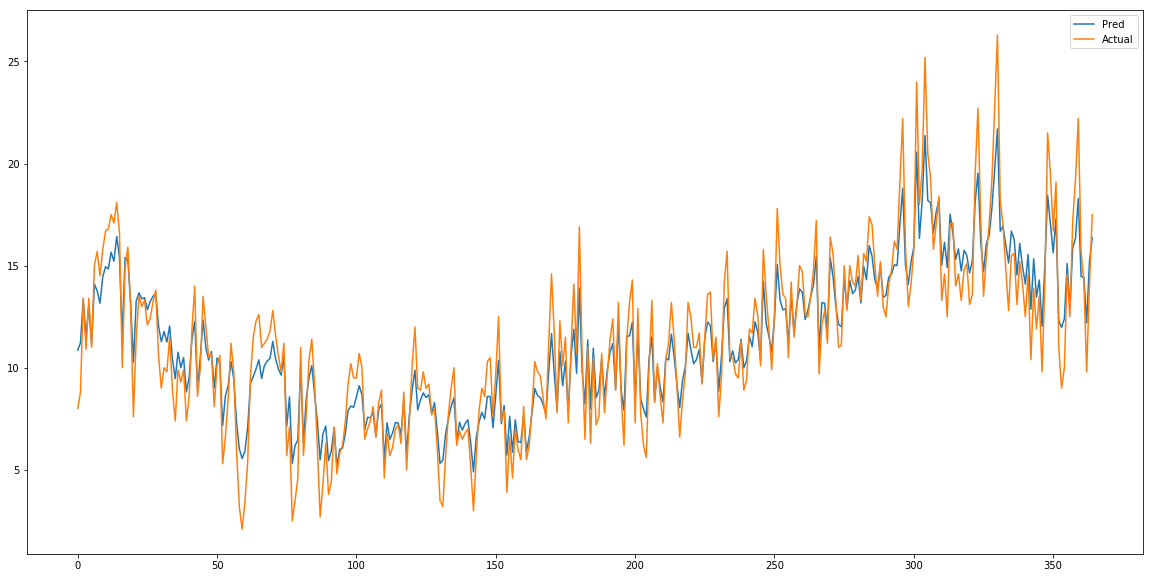

In [188]:
plt.figure(figsize=(20,10))

plt.plot(yhat[:365],label='Pred')
plt.plot(ys[:365],label='Actual')
rmse=sqrt(mean_squared_error(ys,yhat))
print("rmse=",rmse)
plt.legend()

See that This Performance is Better than All previous Models

Next : Triple Exponential Smoothing/ Hotl-Winters Exponential Smoothing

Holt-Winters Hyperparameters:

Alpha: Smoothing factor for level. (Higher alpha means learning fast, learning more from recent)
Beta: Smoothing factor for trend.
Gamma: Smoothing factor for seasonality.
Trend Type: Additive or multiplicative.
Dampen Type: Additive or multiplicative.
Phi: Damping coefficient for trend.
Seasonality Type: Additive or multiplicative.
Period: Time steps in seasonal period.

In [227]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = pd.read_csv('datasets/daily-min-temperatures.csv')
y = np.ravel(data['Temp']) + 0.000000001

model = ExponentialSmoothing(y, trend='additive',
                             damped=True, seasonal='additive', 
                             seasonal_periods=30)


model_fit = model.fit(smoothing_level=0.4, smoothing_slope=0.4, 
                      smoothing_seasonal=None, damping_slope=0.4,
                      optimized=True, use_boxcox=False, 
                      remove_bias=True)

yhat = model_fit.predict(start=100, end=len(y))

[13.   7.6 11.5 ... 13.5 15.7 13. ]
[14.17251981 10.97548774 10.74413103 ... 13.67282995 14.63831496
 13.74380566]
3551
3551


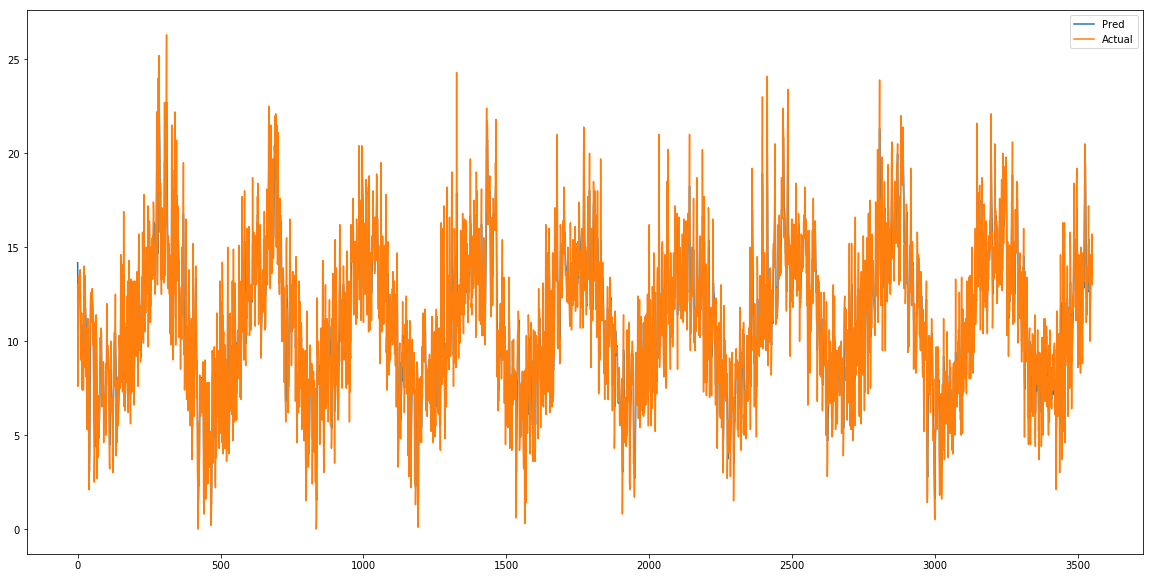

In [228]:
plt.figure(figsize=(20,10))
plt.plot(yhat,label='Pred')
ys = y[-len(yhat):]
plt.plot(ys,label='Actual')
plt.legend()
print(ys)
print(yhat)
print(len(ys))
print(len(yhat))


rmse= 1.4214298067292108


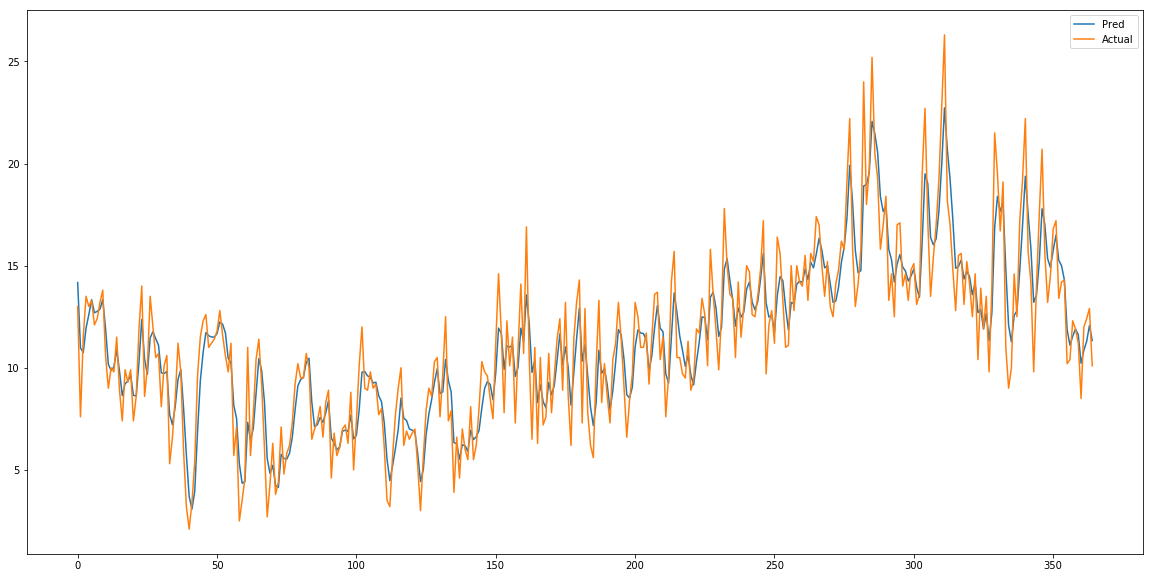

In [229]:
plt.figure(figsize=(20,10))
plt.plot(yhat[:365],label='Pred')
plt.plot(ys[:365],label='Actual')
rmse=sqrt(mean_squared_error(ys,yhat))
print("rmse=",rmse)
plt.legend()